# Air Quality Analysis

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

airData = pd.read_csv("AirQualityUCI.csv")
print("Air Quality Raw Data")
display(airData.head())

Air Quality Raw Data


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


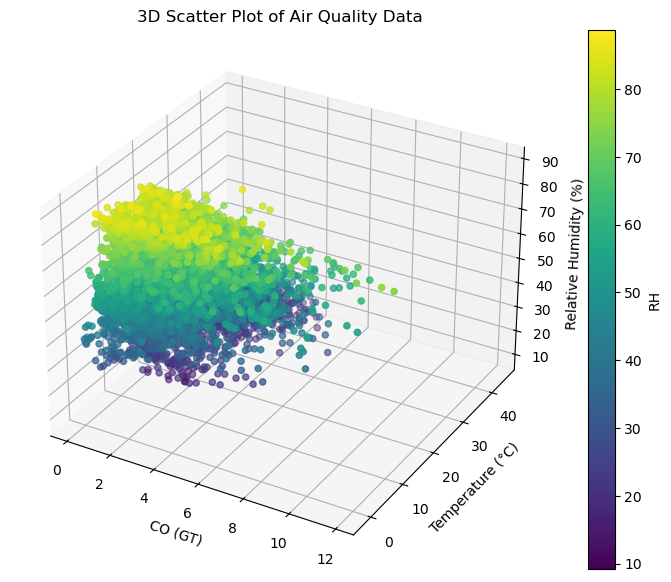

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV while skipping the problematic footer and handling separators
df = pd.read_csv('AirQualityUCI.csv')

# Drop any unnamed columns caused by extra separators
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()  # Clean up whitespace in headers

# Select 3 useful columns and convert to numeric
for col in ['CO(GT)', 'T', 'RH']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace -200 with NaN (missing data)
df.replace(-200, np.nan, inplace=True)

# Drop rows with missing values
df_clean = df.dropna(subset=['CO(GT)', 'T', 'RH'])

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_clean['CO(GT)'], df_clean['T'], df_clean['RH'], c=df_clean['RH'], cmap='viridis')

ax.set_xlabel('CO (GT)')
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('Relative Humidity (%)')
plt.colorbar(sc, label='RH')
plt.title('3D Scatter Plot of Air Quality Data')
plt.show()

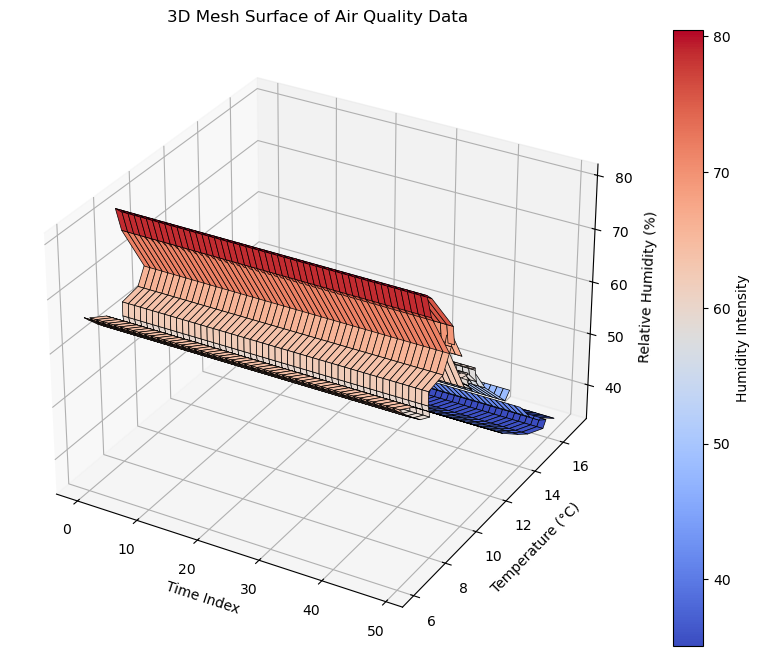

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV
df = pd.read_csv('AirQualityUCI.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

# Select and clean numeric columns
for col in ['T', 'RH', 'AH']:
    df[col] = pd.to_numeric(df[col])

# Replace -200 with NaN (missing data)
df.replace(-200, np.nan, inplace=True)

df_clean = df.dropna(subset=['T', 'RH', 'AH'])

# Use a subset (e.g., first 50 rows) for manageable mesh size
subset = df_clean.iloc[:50]
X = np.arange(len(subset))  # Treat index as 'time'
Y = subset['T'].values
Z = subset['RH'].values

# Create meshgrid
X_grid, Y_grid = np.meshgrid(X, Y)
Z_grid = np.outer(Z, np.ones_like(X))

# Plot 3D surface mesh
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='coolwarm', edgecolor='k', linewidth=0.5)

ax.set_xlabel('Time Index')
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('Relative Humidity (%)')
plt.title('3D Mesh Surface of Air Quality Data')
plt.colorbar(surf, label='Humidity Intensity')
plt.show()

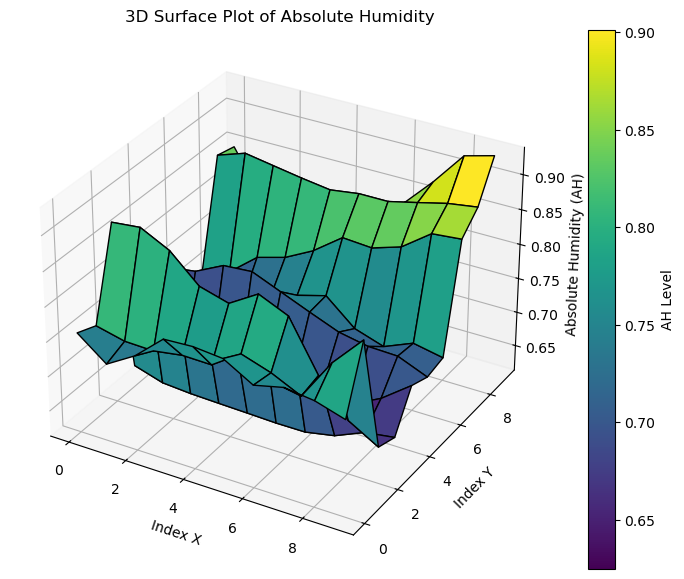

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and clean data
df = pd.read_csv('AirQualityUCI.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

# Convert to numeric and drop rows with missing data
for col in ['T', 'RH', 'AH']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace -200 with NaN (missing data)
df.replace(-200, np.nan, inplace=True)

df_clean = df.dropna(subset=['T', 'RH', 'AH'])

# Select a small 2D block to form a surface (e.g. 10x10 grid)
Z_values = df_clean['AH'].values[:100].reshape(10, 10)  # Absolute Humidity
X = np.arange(10)
Y = np.arange(10)
X_grid, Y_grid = np.meshgrid(X, Y)

# Plot surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_grid, Y_grid, Z_values, cmap='viridis', edgecolor='k')

ax.set_xlabel('Index X')
ax.set_ylabel('Index Y')
ax.set_zlabel('Absolute Humidity (AH)')
ax.set_title('3D Surface Plot of Absolute Humidity')
plt.colorbar(surf, label='AH Level')
plt.show()

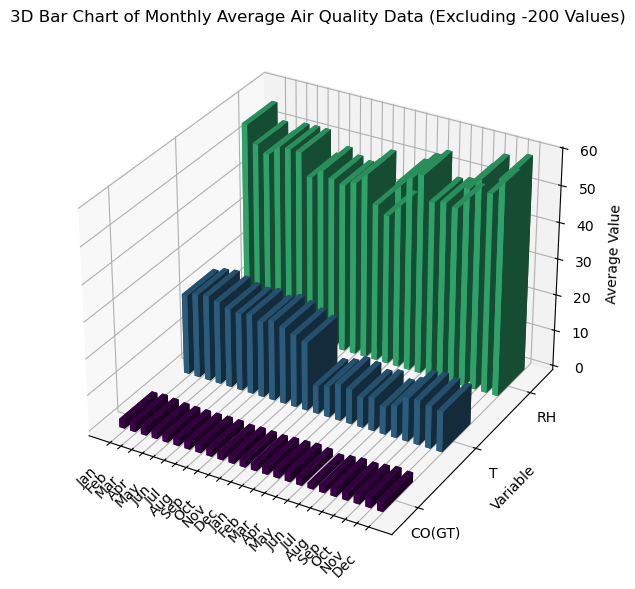

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import calendar

# Load and clean data
df = pd.read_csv('AirQualityUCI.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

# Convert relevant columns to numeric
for col in ['CO(GT)', 'T', 'RH']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace -200 with NaN (missing data)
df.replace(-200, np.nan, inplace=True)

# Parse date and extract month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and calculate mean, skipping NaNs
monthly_avg = df.groupby('Month')[['CO(GT)', 'T', 'RH']].mean().dropna()

# Prepare data for 3D bar plot
months = np.arange(len(monthly_avg))
variables = ['CO(GT)', 'T', 'RH']
xpos, ypos = np.meshgrid(months, np.arange(len(variables)))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Bar heights (z) = average values (flattened by variable then month)
dz = monthly_avg[variables].values.T.flatten()

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.viridis((ypos / len(variables)))

ax.bar3d(xpos, ypos, zpos, dx=0.5, dy=0.5, dz=dz, color=colors, shade=True)


# Label axes
ax.set_ylabel('Variable')
ax.set_zlabel('Average Value')
ax.set_xticks(months + 0.25)
ax.set_xticklabels(
    [calendar.month_abbr[m.month] for m in monthly_avg.index],
    rotation=45,
    ha='right')
ax.set_yticks(np.arange(len(variables)) + 0.25)
ax.set_yticklabels(variables)

plt.title('3D Bar Chart of Monthly Average Air Quality Data (Excluding -200 Values)')
plt.show()